# Iris Data Experiments

This notebook runs the experiments and generates the figures on the [Iris data set](https://archive.ics.uci.edu/ml/datasets/iris). 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import warnings
import itertools as it

# our code packaged for easy use
import detect_simpsons_paradox as dsp


In [2]:
iris_df = pd.read_csv('../../../data/iris.csv')
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


From examining the above, we know that the class is the group-by variables and the float type variables are the continuous attributes. First we select the columns accordingly and output the names of the selected columns of each type to verify.

In [3]:
groupbyAttrs = iris_df.select_dtypes(include=['object'])
groupbyAttrs_labels = list(groupbyAttrs)
print(groupbyAttrs_labels)

['class']


In [4]:
continuousAttrs = iris_df.select_dtypes(include=['float64'])
continuousAttrs_labels = list(continuousAttrs)
print(continuousAttrs_labels)

['sepal length', 'sepal width', 'petal length', 'petal width']


## Results
Now we can run our algorithm and print out the results after a little bit of post-processing to improve readability.

In [5]:
# run detection algorithm
result_df = dsp.detect_simpsons_paradox(iris_df)

# Map attribute index to attribute name
result_df['attr1'] = result_df['attr1'].map(lambda x:continuousAttrs_labels[x])
result_df['attr2'] = result_df['attr2'].map(lambda x:continuousAttrs_labels[x])
# sort for easy reading
result_df = result_df.sort_values(['attr1', 'attr2'], ascending=[1, 1])

result_df

,allCorr,attr1,attr2,reverseCorr,groupbyAttr,subgroup
0,-0.109369,sepal length,sepal width,0.746780,class,Iris-setosa
3,-0.109369,sepal length,sepal width,0.525911,class,Iris-versicolor
6,-0.109369,sepal length,sepal width,0.457228,class,Iris-virginica
1,-0.420516,sepal width,petal length,0.176695,class,Iris-setosa
4,-0.420516,sepal width,petal length,0.560522,class,Iris-versicolor
7,-0.420516,sepal width,petal length,0.401045,class,Iris-virginica
2,-0.356544,sepal width,petal width,0.279973,class,Iris-setosa
5,-0.356544,sepal width,petal width,0.663999,class,Iris-versicolor
8,-0.356544,sepal width,petal width,0.537728,class,Iris-virginica


## Plotting

We plot all data in scatter plots based on each group by attribute, for each pair of candidate attributes. For each plot we add the overall trendline and the trend line for each occurence of Simpson's Paradox. 

## Plotting with data frame

Plots in simpler code

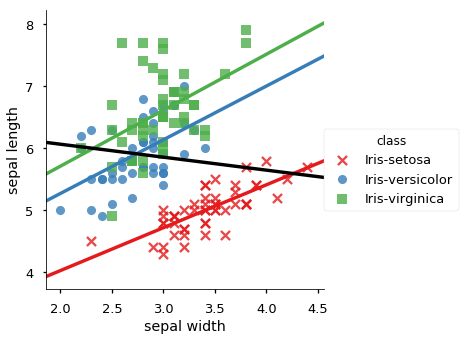

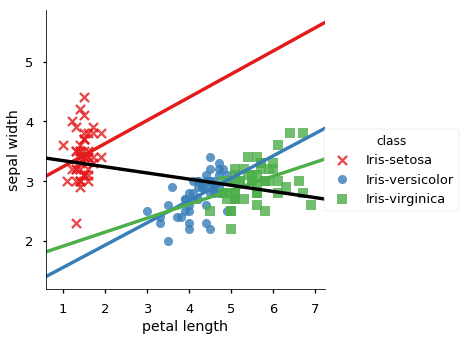

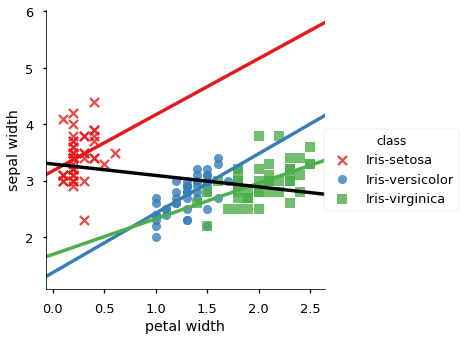

In [6]:
# create a set (to keep only unique) or the attribute pairs that had SP 
sns.set_context("talk")
sp_meas = set([(a,b) for a,b in zip(list(result_df['attr1']), result_df['attr2'])])
# for x,y in it.combinations(measurements,2):
for x, y in sp_meas:
    sns.lmplot(y,x, data=iris_df, hue='class', ci=None,
               markers =['x','o','s'], palette="Set1")
    # adda whole data regression line, but don't cover the scatter data
    sns.regplot(y,x, data=iris_df, color='black', scatter=False, ci=None)

## Experiments on subsampled data

We run our algorithm on 10%, 30%, 50%, 60%, 90% sampled data set with 5 random repeats and for each couont the number of detections. 

In [7]:
portions = [.1,.3, .5, .6, .9]
num_repeats = 5

# for sampling
rows = []
iris_df_portion = []
res_df = dsp.detect_simpsons_paradox(iris_df)
res_df['portion'] = 1
res_df['exp'] = 0


summary_cols = ['portion', 'exp', 'SPcount']
summary_data = [[1,0,len(res_df)]]

    
for i,cur_portion in enumerate(np.repeat(portions,num_repeats)):
    # sample and run detector algorithm
    res_tmp = dsp.detect_simpsons_paradox(iris_df.sample(frac=cur_portion))
    # append results with info on this trial
    res_tmp['portion'] = cur_portion
    res_tmp['exp'] = i +1
    res_df = res_df.append(res_tmp)
    summary_data.append([cur_portion, i, len(res_tmp)])

# make a dataframe of the summary stats
summary_df = pd.DataFrame(data =summary_data, columns =summary_cols)

Now, we can compute descriptive statistics on the occurences summary, using the grouby feature

In [8]:
exp_summary = summary_df.groupby('portion')['SPcount'].describe()
# exp_summary.count()
# summary_df
exp_summary

,count,mean,std,min,25%,50%,75%,max
portion,,,,,,,,
0.1,5.0,6.2,1.788854,4.0,6.0,6.0,6.0,9.0
0.3,5.0,9.0,0.707107,8.0,9.0,9.0,9.0,10.0
0.5,5.0,9.0,0.000000,9.0,9.0,9.0,9.0,9.0
0.6,5.0,8.8,0.447214,8.0,9.0,9.0,9.0,9.0
0.9,5.0,9.0,0.000000,9.0,9.0,9.0,9.0,9.0
1.0,1.0,9.0,NaN,9.0,9.0,9.0,9.0,9.0
